<a href="https://www.kaggle.com/code/aicortex/linearregression-polynomialfeatures-visualize?scriptVersionId=206753592" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center>
<p style = "color : red; font-size : 35px; font-family : 'Comic Sans MS'; ">
    <strong>        
        Linear Regression on Logarithmic Data and Polynomial Features (Visualize)
    </strong>
</p>
</center>


In [1]:
import sklearn
sklearn.__version__

'1.5.2'

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from sklearn.metrics._scorer import _SCORERS
print(_SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'd2_absolute_error_score', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_w

In [4]:
np.random.seed(42)

X = np.linspace(1, 1000, 1000).reshape(-1, 1)
noise_level = 0.2
y = np.log(X) + np.random.normal(0, noise_level, size=len(X)).reshape(-1, 1)
# - 0: Mean of the distribution (center of the bell curve)
# - noise_level: Standard deviation (spread of the distribution)
# - size=len(x): Number of random numbers to generate, matching the length of `X`

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

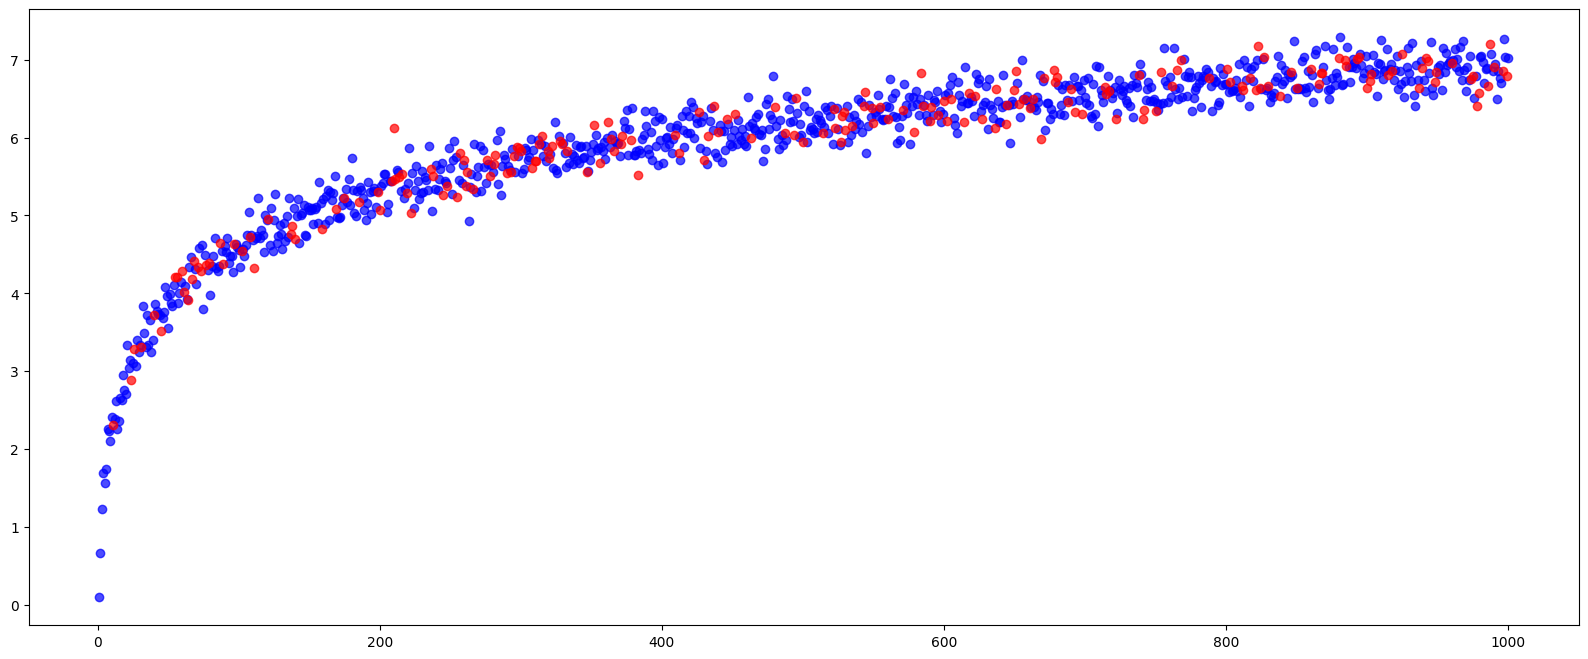

In [5]:
plt.figure(figsize=(20, 8))

plt.scatter(X_train, y_train, color='blue', alpha=0.7, label='Train data')
plt.scatter(X_test, y_test, color='red', alpha=0.7, label='Test data')

plt.show()

In [6]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(f'RMSE : {root_mean_squared_error(y_test, y_pred):2f}')
print(f'r2 : {r2_score(y_test, y_pred):2f}')

RMSE : 0.429498
r2 : 0.770829


# is this model good?

<strong>One effective way to determine if a linear model performs well is by analyzing the residual error.</strong>



What is residual error, and how does it help us?





By analyzing the residuals, you can assess how well your model captures the data:



- Low Residual Error indicates that the model accurately fits the data.

- Random Pattern of Residuals suggests the model correctly captures relationships within the data.

- <i style="color: red; font-size:20px;">Patterns or Trends in Residuals may highlight missing variables, model limitations, or data issues, suggesting the need for adjustments either in the model or in the data itself.</i>

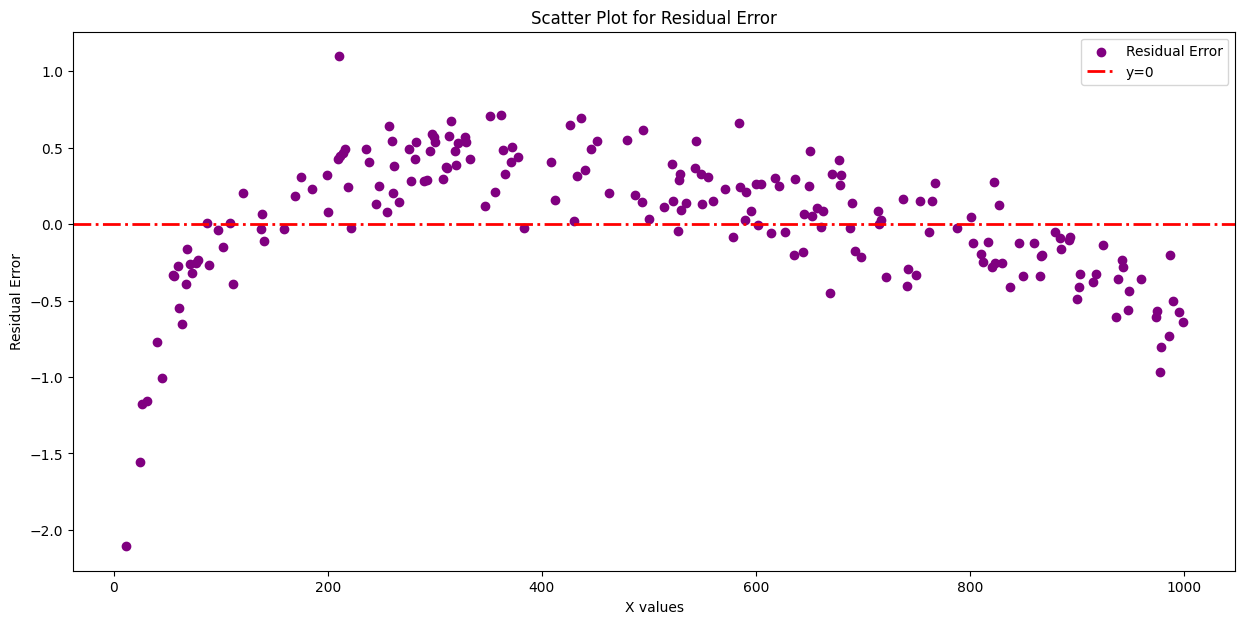

In [7]:
residual_error = y_test - y_pred

plt.figure(figsize=(15, 7))

plt.scatter(X_test, residual_error, color='purple', label='Residual Error')

plt.axhline(y=0, color='red', linestyle='dashdot', linewidth=2, label='y=0')

plt.title("Scatter Plot for Residual Error")
plt.xlabel("X values")
plt.ylabel("Residual Error")
plt.legend()

plt.show()

## Can you spot the pattern? 🧐🧐

Let’s try a different approach: the `normal probability plot` (`QQ-plot`).

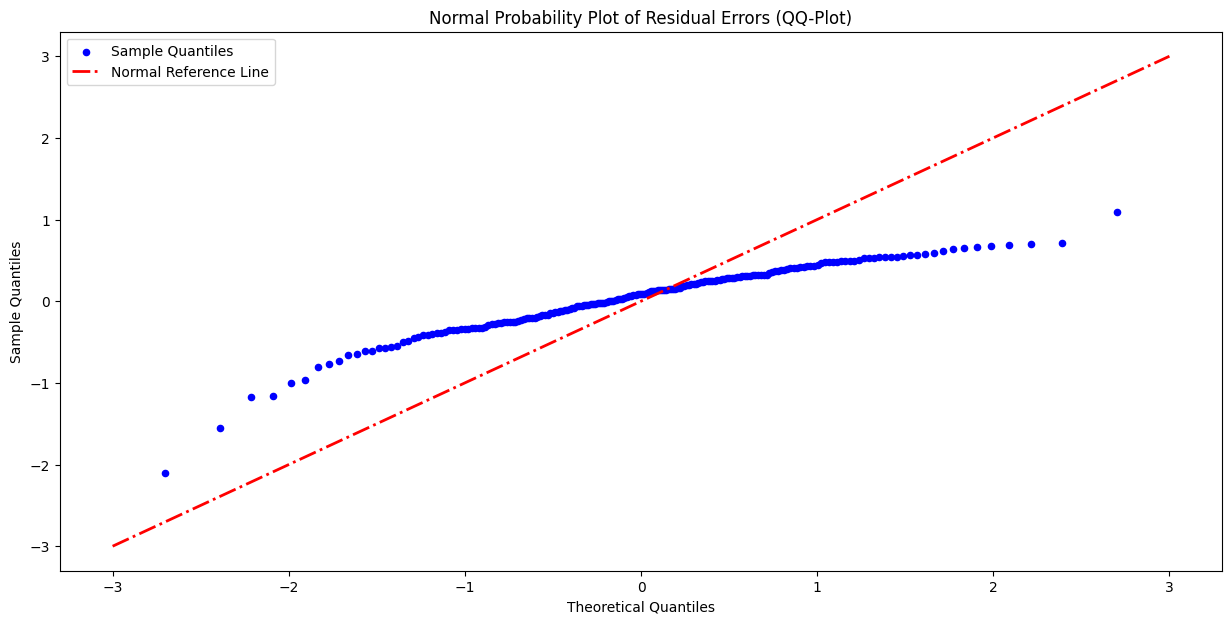

In [8]:
# Calculate the QQ plot data for residuals

qq_x, qq_y = stats.probplot(residual_error.flatten(), dist="norm")[0]

plt.figure(figsize=(15, 7))
plt.scatter(qq_x, qq_y, color='blue', s=20, label='Sample Quantiles')
plt.plot([-3, 3], [-3, 3], color='red', linestyle='dashdot', linewidth=2, label='Normal Reference Line')

plt.title("Normal Probability Plot of Residual Errors (QQ-Plot)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.legend()

plt.show()

<p style="font-family:verdana;">

**In this QQ Plot, you can see that the residuals from our simple linear regression model don’t quite match a normal distribution. Ideally, if the errors were normally distributed, the points would fall along the red line. Here, though, they deviate from it.**

</p>



<p style="font-family:verdana;">

*This suggests that our simple model didn’t capture all the patterns in the data. To improve, we might consider more complex models like polynomial regression or machine learning methods that could better handle these patterns.*

</p>

## Now, what should we do? 😭😭



We have 2 options:



- **Option 1**: Use a complex model.

- **Option 2**: Enhance our features by creating new ones, such as polynomial features. By adding polynomial features, we can capture more complex patterns without switching to a more complicated model. This can improve our model's performance by allowing it to fit non-linear relationships in the data.



Let's go with Option 2 and try feature engineering to see if it helps! 🤞🤞

Since we only have one input feature, `x`, the question is, what degree should we choose for **PolynomialFeatures**? 🤔



Let’s keep it simple and use a loop to test degrees from 2 to 13 and see which one works best. This way, we can explore how adding different powers of `x` might improve the model without using complex models. 😎

In [9]:
df = pd.DataFrame(columns=['Degree', 'RMSE', 'r2'])

for degree in range(2, 14):
    poly = PolynomialFeatures(degree=degree)
    poly.fit(X_train)

    X_train_poly = poly.transform(X_train)
    X_test_poly = poly.transform(X_test)

    model2 = LinearRegression()
    model2.fit(X_train_poly, y_train)

    y_pred = model2.predict(X_test_poly)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) 

    df.loc[len(df.index)] = (degree, rmse, r2)

df.sort_values(by=['r2'], ascending=False)

,Degree,RMSE,r2
3,5.0,0.221048,0.939297
2,4.0,0.226618,0.936199
1,3.0,0.254626,0.919455
4,6.0,0.271378,0.908507
0,2.0,0.293021,0.893332
5,7.0,0.300972,0.887464
6,8.0,0.351935,0.846127
7,9.0,0.415770,0.785245
8,10.0,0.470327,0.725187
9,11.0,0.508788,0.678404


<p style="font-family=verdana">

Although degree 5 gives the best results, it’s often safer to step back by one degree to avoid overfitting. Choosing degree 4 helps create a more general model that captures the main patterns without becoming too specific to our current data. This way, the model is more likely to perform well on new data too!

</p>


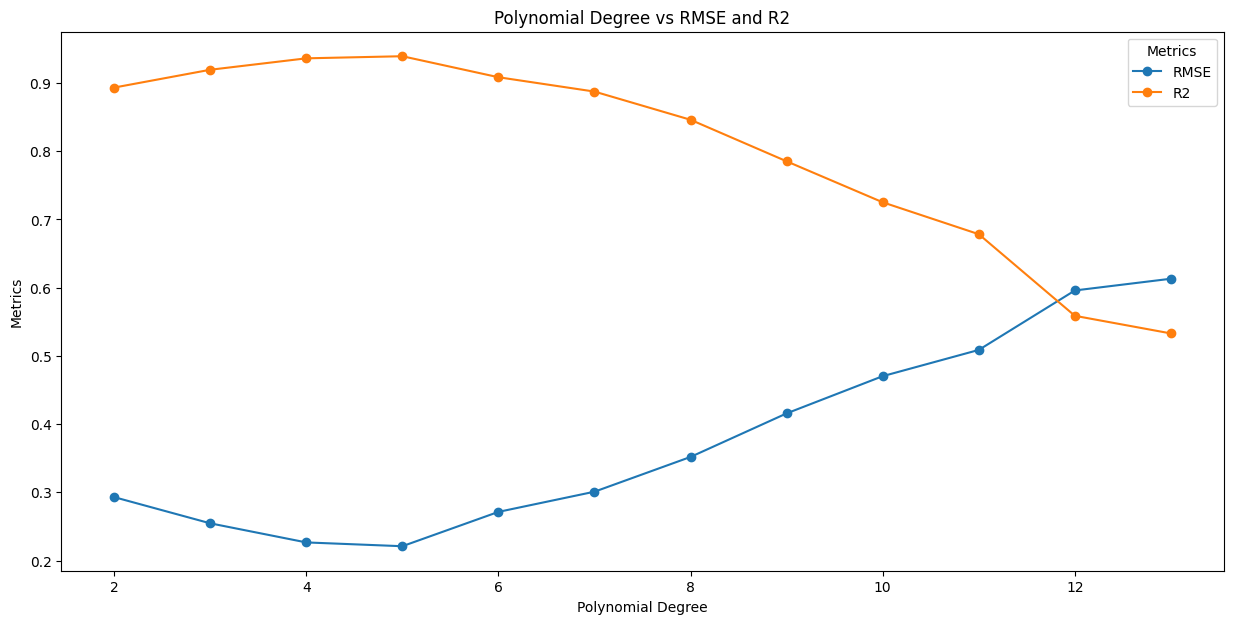

In [10]:
plt.figure(figsize=(15, 7))

plt.plot(df["Degree"], df["RMSE"], marker="o", label="RMSE")
plt.plot(df["Degree"], df["r2"], marker="o", label="R2")

plt.title("Polynomial Degree vs RMSE and R2")
plt.xlabel("Polynomial Degree")
plt.ylabel("Metrics")

plt.legend(title="Metrics")

plt.show()

<div class="alert alert-block alert-info" style="font-family:verdana; line-height: 1.7em;">
The data you're seeing here is test data, which allows us to try out different model settings. But in many real cases, we don’t have the luxury of testing all options on test data. Usually, we only have training and validation data, and due to large volumes, it’s not always practical to test every possible configuration. Since this is an educational notebook, though, we're making an exception and exploring all the possibilities to give you a clear view of how different setups perform</div>




# create the best model 🤩🤩

In [11]:
poly = PolynomialFeatures(degree=4)
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

y_pred = model2.predict(X_test_poly)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE : {rmse:.2f}')
print(f'r2 : {r2:.2f}')

RMSE : 0.23
r2 : 0.94


In [12]:
pd.DataFrame(list(zip(poly.get_feature_names_out(), model2.coef_[0])), columns=['Feature', 'Coefficient'])

,Feature,Coefficient
0,1,0.000000e+00
1,x0,2.521433e-02
2,x0^2,-6.768186e-05
3,x0^3,8.117584e-08
4,x0^4,-3.445460e-11


<p style = "color : #f55c47; font-size : 35px; font-family : 'Comic Sans MS';">
    <strong>
        If you like this, Please do upvote.😊🌹
    </strong>
</p>